# Project Details

       1. Data wrangling, which consists of:
           Gathering data
                   i. From 'twitter-archive-enhanced.csv' file. "given"
                  ii. From a link provided for "image predictions".
                 iii. From twitter API.
    2. Assessing data
    3. Cleaning data

   Finally: Storing, analyzing, and visualizing your wrangled data
   then give two Reports on
   1. Data wrangling efforts.
   2. Data analyses and Visualizations

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import os
from twitter_api import get_twitter_data
import json
from sqlalchemy import create_engine
from PIL import Image
from io import BytesIO

# Gathering

In [2]:
#load twitter archive file into pandas df.
df_archE = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#download image predictions file.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(url.split('/')[-1]), 'wb') as file:
    file.write(response.content)

In [4]:
# load image predictions file into pandas df.
df_predI = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#download data from twitter API 
if not os.path.exists('tweet_json.txt'):
    get_twitter_data(df_arch, 'tweet_json.txt')

In [6]:
#load tweets data into pandas df
with open('tweet_json.txt') as file:
    df_apiJ = pd.read_json(file, lines= True, encoding = 'utf-8')




# Assessing

In [7]:
df_archE

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
df_archE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_archE[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [10]:
df_archE.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
df_archE.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Sully        1
Covach       1
Ulysses      1
Mitch        1
Billl        1
Name: name, Length: 957, dtype: int64

In [12]:
df_archE[df_archE.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [13]:
# looking for numerators with wrong values in chunks
df_archE[df_archE.rating_numerator <= 5].loc[0:1000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,None,None,None
765,777885040357281792,NaN,NaN,2016-09-19 15:00:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wesley. He's clearly trespassing. Seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,None,None,None,None
883,760252756032651264,NaN,NaN,2016-08-01 23:15:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fido. He can tell the weather. Not goo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,None,None,None,None
912,757596066325864448,NaN,NaN,2016-07-25 15:19:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's another picture without a dog in it. Id...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757596066...,4,10,None,None,None,None,None
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [14]:
df_archE[df_archE.rating_numerator <= 5].loc[1000:2000, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1189,718246886998687744,NaN,NaN,2016-04-08 01:19:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,None,None,None,None
1219,714631576617938945,NaN,NaN,2016-03-29 01:53:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He's a feisty pup. Needs a b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
1303,707420581654872064,NaN,NaN,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,None,None,None,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
1399,699691744225525762,NaN,NaN,2016-02-16 20:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,None,None
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None


In [15]:
df_archE[df_archE.rating_numerator <= 5].loc[2000:, :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2013,672231046314901505,NaN,NaN,2015-12-03 01:49:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Exotic underwater dog here. Very shy. Wont ret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672231046...,5,10,None,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
2070,671122204919246848,NaN,NaN,2015-11-30 00:22:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two miniature golden retrievers here. Webbed p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671122204...,4,10,None,None,None,None,None
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
2079,670826280409919488,NaN,NaN,2015-11-29 04:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Scary dog here. Too many legs. Extra tail. Not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670826280...,2,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2092,670782429121134593,NaN,NaN,2015-11-29 01:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dude slaps your girl's ass what do you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670782429...,5,10,None,None,None,None,None
2109,670449342516494336,NaN,NaN,2015-11-28 03:49:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Vibrant dog here. Fabulous tail. Only 2 legs t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670449342...,5,10,None,None,None,None,None


In [16]:
df_predI

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
df_predI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
df_predI.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [19]:
df_predI.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [20]:
df_predI.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [21]:
df_apiJ

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2327,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2328,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2329,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [22]:
df_apiJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2331 non-null   datetime64[ns, UTC]
 1   id                             2331 non-null   int64              
 2   id_str                         2331 non-null   int64              
 3   full_text                      2331 non-null   object             
 4   truncated                      2331 non-null   bool               
 5   display_text_range             2331 non-null   object             
 6   entities                       2331 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2331 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [23]:
df_apiJ.lang.value_counts()

en     2313
und       7
in        3
nl        3
et        1
ro        1
eu        1
es        1
tl        1
Name: lang, dtype: int64





# Observations

The following observations were made visually and Programmaticly using pandas functions to know the problems of the dataset provided and to be easy for me to cover in the following cleaning step.

Quality
1. Columns (doggo, floofer, pupper, puppo) has None for missing values.
2. source column is html tag and we can extract the source of the tweet and covert it to categorical.
3. text column has the link for the tweets and ratings at the end "not needed and can be removed.
4. timestamp column is str instead of datetime
5. We are interested in the tweet ONLY not the retweets.
6. We are interested in the tweet ONLY not the reply to the original tweet.
7. The rating_numerator column should of type float and should be correctly extracted.
8. rating_denominator column has values less than 10 and values more than 10 for ratings more than one dog.
9. expanded_urls column has "NaN" values
10. id column in df_apiJ name different than the other 2 data sets.
11. name column have None instead of NaN and too many unvalid values.

Tidiness
1. doggo, floofer, pupper, puppo columns are all about the same things, a kind of dog personality.
2. img_num useless.
3. the columns (p1, p1_dog, p1_conf, ...etc) should be just breed and confidence.
4. Just 3 columns needed id, retweet_count, favorite_count.

Finally,
* All datasets should be combined into 1 dataset only

# Cleaning

In [24]:
#take a copy from our data frames to work on cleaning it.
df_archE_cleaned = df_archE.copy()
df_predI_cleaned = df_predI.copy()
df_apiJ_cleaned = df_apiJ.copy()

# Define,
Replace 'None' with np.nan for Columns (doggo, floofer, pupper, puppo).

# Code

In [25]:
col_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in col_list:
    df_archE_cleaned[col] = df_archE_cleaned[col].replace('None', np.nan)

# Test

In [26]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       97 no

# Define
Extract tweet source from source column using apply meth in pandas and convert it to categorical.

# Code

In [27]:
# check for the unique values
df_archE_cleaned.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [28]:
#make a function fix_source which extract the strings between tags
def fix_source(x):
    'x is an html string from the source column in df_archE_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [29]:
df_archE_cleaned.source = df_archE_cleaned.source.apply(lambda x: fix_source(x)).astype('category')

# Test

In [30]:
# check for the unique values
df_archE_cleaned.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']

# Define
Extract rating scores correctly from tweet text using RegEx and convert it to float

In [31]:
df_archE_cleaned[df_archE_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

C:\Users\abdelrhman\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
340,"RT @dog_rates: This is Logan, the Chow who liv...",75
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [32]:
new_ratings = df_archE_cleaned[df_archE_cleaned.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_ratings

C:\Users\abdelrhman\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [33]:
df_archE_cleaned.loc[new_ratings.index, 'rating_numerator'] = new_ratings.values

In [34]:
df_archE_cleaned.rating_numerator = df_archE_cleaned.rating_numerator.astype('float')

# Test

In [35]:
df_archE_cleaned.loc[new_ratings.index]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,Twitter for iPhone,"RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,9.50,10,None,NaN,NaN,NaN,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,NaN,NaN,NaN,NaN


In [36]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   category
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   float64 
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  doggo             

# Define
Remove ratings and links from text column using RegEx.

# Code

In [37]:
df_archE_cleaned.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [38]:
df_archE_cleaned.text = df_archE_cleaned.text.str.extract('(.+(?=\s\d+/\d+\s))')

# Test

In [39]:
df_archE_cleaned.text.sample(10)

2161    This is a Coriander Baton Rouge named Alfredo....
692      RT @dog_rates: This is Carl. He's very powerful.
2013    Exotic underwater dog here. Very shy. Wont ret...
1771    This is Rosie. She has a snazzy bow tie and a ...
1430           This is Ole. He's not sure how to gravity.
898     This is Lilli Bee &amp; Honey Bear. Unfortunat...
198     This is Einstein. He's having a really good da...
1011    This is Linus. He just wanted to say hello but...
935                 This is Scout. Her batteries are low.
709     This is Hero. He was enjoying the car ride unt...
Name: text, dtype: object

# Define
Converte timestamp column to datetime.

# Code

In [40]:
df_archE_cleaned.timestamp = pd.to_datetime(df_archE_cleaned.timestamp)

# Test

In [41]:
df_archE_cleaned.timestamp.dtype

datetime64[ns, UTC]

# Define
Remove retweets and replies.

# Code

In [42]:
df_archE_cleaned = df_archE_cleaned.query('in_reply_to_status_id.isnull() &\
                                                     in_reply_to_user_id.isnull() &\
                                                    retweeted_status_id.isnull() &\
                                                    retweeted_status_user_id.isnull()', engine="python")
# drop columns
cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id', 'retweeted_status_timestamp']
df_archE_cleaned.drop(columns = cols, axis=1, inplace=True)

# Test

In [43]:
# check for Null values in the df_arch_cleaned
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   category           
 3   text                2029 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   float64            
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               83 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              230 non-null    object             
 11  puppo               24 non-null     object             
dtypes: category(1), datetime64[ns, UTC

# Define
Remove values other than 10 for rating_denominato

# Code

In [44]:
df_archE_cleaned = df_archE_cleaned[df_archE_cleaned['rating_denominator'] == 10]

# Test

In [45]:
df_archE_cleaned[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2080.000000,2080.0
mean,11.656144,10.0
std,39.789764,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


# Define
Remove any rows not related to dogs

# Code

In [46]:
df_archE_cleaned = df_archE_cleaned[~df_archE_cleaned.text.isnull()]

In [47]:
df_archE_cleaned = df_archE_cleaned.loc[~df_archE_cleaned.text.str.match('.*only rate dogs')]

# Test

In [48]:
df_archE_cleaned.loc[df_archE_cleaned.text.str.match('.*only rate dogs')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [49]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   category           
 3   text                1963 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1963 non-null   float64            
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              225 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

# Define
Drop rows with NaNs for expanded_urls column.

# Code

In [50]:
df_archE_cleaned = df_archE_cleaned.loc[~df_archE_cleaned.expanded_urls.isnull()]

# Test

In [51]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1961 non-null   object             
 8   doggo               82 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              224 non-null    object             
 11  puppo               23 non-null     object             
dtypes: category(1), datetime64[ns, UTC

# Define
Create dog_stage column and remove the (doggo, floofer, pupper, puppo) columns.

# Code

In [52]:
# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_archE_cleaned['dog_stage'] = df_archE_cleaned[cols].\
                                        apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)
# replace the empty string with nan and change datatype to category
df_archE_cleaned.dog_stage = df_archE_cleaned.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_archE_cleaned = df_archE_cleaned.drop(columns = cols, axis =1)

# Test 

In [53]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1961 non-null   object             
 8   dog_stage           328 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.9+ KB


In [54]:
df_archE_cleaned.dog_stage.value_counts()

pupper            215
doggo              71
puppo              22
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

# Define
Replace 'None' with np.name in df_arch name column.
Remove any rows with invalid names which starts with lower laters.

# Code

In [55]:
df_archE_cleaned[~df_archE_cleaned.name.str.istitle()].name.unique()

array(['such', 'a', 'not', 'one', 'BeBe', 'DonDon', 'my', 'his',
       'actually', 'just', 'mad', 'all', 'old', 'infuriating', 'CeCe',
       'the', 'by', 'officially', 'life', 'light', 'space', 'JD', 'an',
       'DayZ', 'quite'], dtype=object)

In [56]:
df_archE_cleaned.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

# Test

In [57]:
df_archE_cleaned.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis', 'Bella', 'Jesse',
       'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy',
       'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger',
       'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn',
       'Zooey', 'Dave', 'Jersey', 'Hobbes', 'Burt', 'Carl', 'Jor

In [58]:
df_archE_cleaned.name.value_counts()

Lucy       11
Charlie    11
Oliver     10
Cooper     10
Tucker      9
           ..
Nico        1
Pawnd       1
Shiloh      1
Malikai     1
Billl       1
Name: name, Length: 911, dtype: int64

In [59]:
df_archE_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1961 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1961 non-null   int64              
 1   timestamp           1961 non-null   datetime64[ns, UTC]
 2   source              1961 non-null   category           
 3   text                1961 non-null   object             
 4   expanded_urls       1961 non-null   object             
 5   rating_numerator    1961 non-null   float64            
 6   rating_denominator  1961 non-null   int64              
 7   name                1362 non-null   object             
 8   dog_stage           328 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 126.9+ KB


# Define
Remove img_num column from df_pred_cleand.

# Code

In [60]:
df_predI_cleaned.drop('img_num', axis=1, inplace=True)

# Test

In [61]:
df_predI_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


# Define
Create breed and confidence columns with highest confidence predictions and drop other columns

# Code

In [62]:
breed = []
confidence = []
# iterating over df_predI row by row and taking the highest confident prediction other wise np.nan
for index, row in df_predI_cleaned.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_predI_cleaned['breed'] = breed
df_predI_cleaned['confidence'] = confidence

In [63]:
df_predI_cleaned = df_predI_cleaned[['tweet_id', 'jpg_url', 'breed', 'confidence']]

# Test

In [64]:
df_predI_cleaned.sample(20)

,tweet_id,jpg_url,breed,confidence
805,691756958957883396,https://pbs.twimg.com/media/CZmdSD8UcAAnY5R.jpg,Saint_Bernard,0.342571
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,NaN,NaN
1188,739544079319588864,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,Labrador_retriever,0.967397
112,667911425562669056,https://pbs.twimg.com/media/CUTl5m1WUAAabZG.jpg,NaN,NaN
1783,829011960981237760,https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg,boxer,0.312221
46,666804364988780544,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,English_setter,0.328792
825,693262851218264065,https://pbs.twimg.com/media/CZ724fDUYAAytS-.jpg,golden_retriever,0.989333
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,soft-coated_wheaten_terrier,0.948617
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,Labrador_retriever,0.367818


In [65]:
df_predI_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   breed       1532 non-null   object 
 3   confidence  1532 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 65.0+ KB


# Define
Remove unnecessary columns for df_api_cleand

# Code

In [66]:
df_apiJ_cleaned.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [67]:
df_apiJ_cleaned = df_apiJ_cleaned[['id', 'retweet_count', 'favorite_count']]

# Test

In [68]:
df_apiJ_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


# Define
Rename id column in df_api_cleand to tweet_id

# Code

In [69]:
df_apiJ_cleaned.columns = ['tweet_id', 'retweet_count', 'favorite_count']

# Test

In [70]:
df_apiJ_cleaned.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

# Define
merge data into one database

# Code

In [71]:
df = pd.merge(df_archE_cleaned, df_predI_cleaned, on='tweet_id')
df = pd.merge(df, df_apiJ_cleaned, on = 'tweet_id')

In [72]:
# Create SQLAlchemy Engine and empty twitter_archive_master database
engine = create_engine('sqlite:///twitter_archive_master.db')
# Store master df into table master 
try:
    df.to_sql('master', engine, index=False)
except Exception as e:
    print(e)

Table 'master' already exists.


# Test

In [73]:
df_master = pd.read_sql('SELECT * FROM master', engine, parse_dates='timestamp')
df_master.source = df_master.source.astype('category')
df_master.dog_stage = df_master.dog_stage.astype('category')
df_master.breed = df_master.breed.astype('category')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1834 non-null   int64         
 1   timestamp           1834 non-null   datetime64[ns]
 2   source              1834 non-null   category      
 3   text                1834 non-null   object        
 4   expanded_urls       1834 non-null   object        
 5   rating_numerator    1834 non-null   float64       
 6   rating_denominator  1834 non-null   int64         
 7   name                1316 non-null   object        
 8   dog_stage           295 non-null    category      
 9   jpg_url             1834 non-null   object        
 10  breed               1350 non-null   category      
 11  confidence          1350 non-null   float64       
 12  retweet_count       1834 non-null   int64         
 13  favorite_count      1834 non-null   int64       

# Visualizations
let's have a look for the ratings distribution by ploting a bar chart for it's frequency.

C:\Users\abdelrhman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


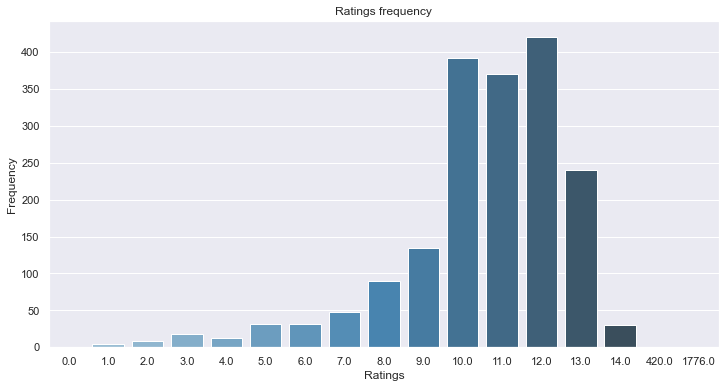

In [74]:
data = df_master.rating_numerator.value_counts()

x = data.index
y = data.values
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x, y, palette='Blues_d', ax=ax)
ax.set(xlabel='Ratings', ylabel='Frequency', title='Ratings frequency')
plt.show()

C:\Users\abdelrhman\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\abdelrhman\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


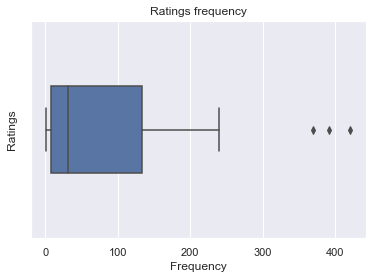

In [75]:
data = df_master.rating_numerator.value_counts()

ax = sns.boxplot(data, orient='v', width=.4)
ax.set(xlabel='Frequency', ylabel='Ratings', title='Ratings frequency')
plt.show()

In [76]:
outliers_df = df_master[df_master.rating_numerator > 400][['rating_numerator', 'name', 'jpg_url', 'text']]
outliers_df

,rating_numerator,name,jpg_url,text
676,1776.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,This is Atticus. He's quite simply America af.
1578,420.0,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Good dogg.


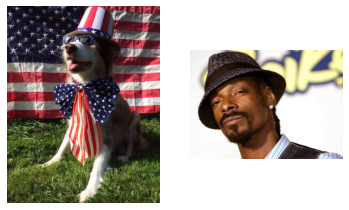

In [77]:
if not os.path.exists('images'):
    os.makedirs('images')
fig=plt.figure()
c = 1
for index, row in outliers_df.iterrows():
    r = requests.get(row['jpg_url'])
    i = Image.open(BytesIO(r.content))
    i.save('images/' +  str(index) + '_' + str(row['rating_numerator']) + "_" + str(row['name']) + '.jpg')
    fig.add_subplot(1, 2, c)
    c += 1
    plt.imshow(i)
    plt.axis("off")
plt.show()

# Define
So we can see here that the picture with 1776 rating is simply very cute dog and has the best rating score but the other pic with 420 rating score is the rap star Snoop Dogg and should be removed from our data.

# Code

In [78]:
# Remove 'Snoop Dogg' from our master data
df_master.drop(index=1552, inplace=True)

# Test

In [79]:
df_master.query('rating_numerator == 420')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,breed,confidence,retweet_count,favorite_count
1578,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,Good dogg.,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,NaN,NaN,8189,23472


In [80]:
df_master.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.100e+01, 6.000e+00, 1.000e+01,
       0.000e+00, 5.000e+00, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00,
       4.000e+00, 1.776e+03, 2.000e+00, 1.000e+00, 4.200e+02])

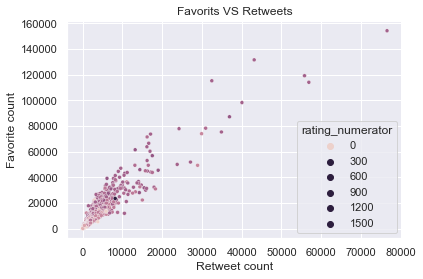

In [81]:
# Scatter plot to show the relation between favorits and retweets
ax = sns.scatterplot(x='retweet_count', y='favorite_count', data=df_master,
                     hue='rating_numerator', hue_norm=(5, 20), s=15) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

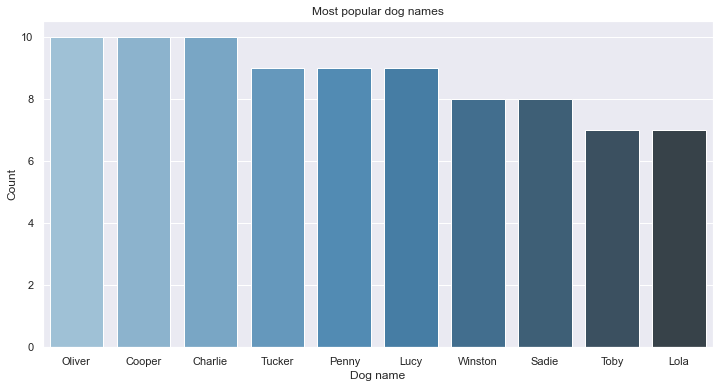

In [82]:
data = pd.read_sql("""SELECT name, COUNT(*) AS count
                        FROM master 
                    GROUP BY 1
                      HAVING name <> 'A'
                    ORDER BY 2 DESC
                       LIMIT 10;
                  """, engine)
fig, ax = plt.subplots(figsize=(12, 6))
g = sns.barplot(x='name', y='count', data=data, palette='Blues_d', ax=ax)
ax.set(ylabel='Count', xlabel='Dog name', title='Most popular dog names')
plt.show()